# Exercise 3-2

Author: Kimberly Cable
    
Date: 04-02-2022

## Exercise 1 - 1

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [3]:
import nsfg

In [4]:
preg = nsfg.ReadFemPreg()
preg.head()

caseid  pregordr  howpreg_n  howpreg_p  moscurrp  nowprgdk  pregend1  \
0       1         1        NaN        NaN       NaN       NaN       6.0   
1       1         2        NaN        NaN       NaN       NaN       6.0   
2       2         1        NaN        NaN       NaN       NaN       5.0   
3       2         2        NaN        NaN       NaN       NaN       6.0   
4       2         3        NaN        NaN       NaN       NaN       6.0   

   pregend2  nbrnaliv  multbrth  ...  laborfor_i  religion_i  metro_i  \
0       NaN       1.0       NaN  ...           0           0        0   
1       NaN       1.0       NaN  ...           0           0        0   
2       NaN       3.0       5.0  ...           0           0        0   
3       NaN       1.0       NaN  ...           0           0        0   
4       NaN       1.0       NaN  ...           0           0        0   

       basewgt  adj_mod_basewgt      finalwgt  secu_p  sest  cmintvw  \
0  3410.389399      3869.349602   6448.271112       2     9      NaN   
1  3410.389399      3869.349602   6448.271112       2     9      NaN   
2  7226.301740      8567.549110  12999.542264       2    12      NaN   
3  7226.301740      8567.549110  12999.542264       2    12      NaN   
4  7226.301740      8567.549110  12999.542264       2    12      NaN   

   totalwgt_lb  
0       8.8125  
1       7.8750  
2       9.1250  
3       7.0000  
4       6.1875  

[5 rows x 244 columns]

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [5]:
preg.birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

We can also use `isnull` to count the number of nans.

In [6]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [7]:
preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [8]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [9]:
preg['totalwgt_kg'] = preg.totalwgt_lb / 2.2
preg.totalwgt_kg.mean()

3.302558389828807

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [10]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [11]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [12]:
resp.head()

caseid  rscrinf  rdormres  rostscrn  rscreenhisp  rscreenrace  age_a  \
0    2298        1         5         5            1          5.0     27   
1    5012        1         5         1            5          5.0     42   
2   11586        1         5         1            5          5.0     43   
3    6794        5         5         4            1          5.0     15   
4     616        1         5         4            1          5.0     20   

   age_r  cmbirth  agescrn  ...  pubassis_i      basewgt  adj_mod_basewgt  \
0     27      902       27  ...           0  3247.916977      5123.759559   
1     42      718       42  ...           0  2335.279149      2846.799490   
2     43      708       43  ...           0  2335.279149      2846.799490   
3     15     1042       15  ...           0  3783.152221      5071.464231   
4     20      991       20  ...           0  5341.329968      6437.335772   

      finalwgt  secu_r  sest  cmintvw  cmlstyr  screentime   intvlngth  
0  5556.717241       2    18     1234     1222    18:26:36  110.492667  
1  4744.191350       2    18     1233     1221    16:30:59   64.294000  
2  4744.191350       2    18     1234     1222    18:19:09   75.149167  
3  5923.977368       2    18     1234     1222    15:54:43   28.642833  
4  7229.128072       2    18     1233     1221    14:19:44   69.502667  

[5 rows x 3087 columns]

Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [13]:
resp.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [14]:
resp[resp.caseid == 2298]

caseid  rscrinf  rdormres  rostscrn  rscreenhisp  rscreenrace  age_a  \
0    2298        1         5         5            1          5.0     27   

   age_r  cmbirth  agescrn  ...  pubassis_i      basewgt  adj_mod_basewgt  \
0     27      902       27  ...           0  3247.916977      5123.759559   

      finalwgt  secu_r  sest  cmintvw  cmlstyr  screentime   intvlngth  
0  5556.717241       2    18     1234     1222    18:26:36  110.492667  

[1 rows x 3087 columns]

And we can get the corresponding rows from `preg` like this:

In [15]:
preg[preg.caseid == 2298]

caseid  pregordr  howpreg_n  howpreg_p  moscurrp  nowprgdk  pregend1  \
2610    2298         1        NaN        NaN       NaN       NaN       6.0   
2611    2298         2        NaN        NaN       NaN       NaN       6.0   
2612    2298         3        NaN        NaN       NaN       NaN       6.0   
2613    2298         4        NaN        NaN       NaN       NaN       6.0   

      pregend2  nbrnaliv  multbrth  ...  religion_i  metro_i      basewgt  \
2610       NaN       1.0       NaN  ...           0        0  3247.916977   
2611       NaN       1.0       NaN  ...           0        0  3247.916977   
2612       NaN       1.0       NaN  ...           0        0  3247.916977   
2613       NaN       1.0       NaN  ...           0        0  3247.916977   

      adj_mod_basewgt     finalwgt  secu_p  sest  cmintvw  totalwgt_lb  \
2610      5123.759559  5556.717241       2    18      NaN       6.8750   
2611      5123.759559  5556.717241       2    18      NaN       5.5000   
2612      5123.759559  5556.717241       2    18      NaN       4.1875   
2613      5123.759559  5556.717241       2    18      NaN       6.8750   

      totalwgt_kg  
2610     3.125000  
2611     2.500000  
2612     1.903409  
2613     3.125000  

[4 rows x 245 columns]

How old is the respondent with `caseid` 1?

In [16]:
resp[resp.caseid == 1].age_r

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [17]:
preg[preg.caseid == 2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [18]:
preg[preg.caseid == 5012].birthwgt_lb

5515    6.0
Name: birthwgt_lb, dtype: float64

## Exercise 1 - 2

Print the value counts for the variable pregum

In [19]:
resp_pregnum_counts = resp.pregnum.value_counts().sort_index()
resp_pregnum_counts

0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: pregnum, dtype: int64

In [20]:
# Get the number of caseids using value count and convert it to a list
# Using the Collections package get the frequency of the number of births to compare to the resp pregnum counts

import collections
preg_count = preg['caseid'].value_counts().tolist()

preg_pregnum = collections.Counter(preg_count)
preg_pregnum

Counter({19: 1,
         14: 2,
         12: 2,
         11: 3,
         10: 9,
         9: 21,
         8: 40,
         7: 80,
         6: 150,
         5: 305,
         4: 611,
         3: 1110,
         2: 1432,
         1: 1267})

## Exercise 2 - 1

For the evening news, I would use the mean (really average) and spreads.  Average because most people when talking about
newborn babies most talk about when the baby was born from the conventional 40 weeks.
I would also talk about the spread because not all babies are born at 40 weeks and many like to know the earliest a baby
was born to the latest.

For an anxious parent, I would use the mean (really average) because an average is a good number for a parent to relate to.

For straight dope, it is the perception that first babies arrive late and subsequent babies arrive must sooner. Looking at the average pregnancy length for first babies is 38.601 days and subsequent babies are 38.523 days. This is only a difference of about 13 hours. Because 13 hours is less than one day, I would summize that the perception that first babies are usually late is incorrect and are in fact no later or earlier than other babies.

## Exercise 2 - 4

In [21]:
import matplotlib.pyplot as plt
from math import sqrt

In [22]:
# get first born data from pregnancy dataset
weight_firstborns = preg[preg.birthord == 1]

# get non first born data from pregnancy data
weight_others = preg[preg.birthord != 1]

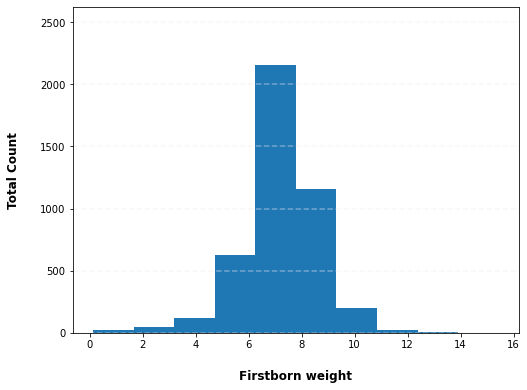

In [23]:
# create histogram of first born total weight
firstborns_hist = weight_firstborns.hist(column = 'totalwgt_lb', bins = 10, figsize = (8,6), grid = False)

firstborns_hist = firstborns_hist[0]
for x in firstborns_hist:
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
        
    # Remove title
    x.set_title("")
    
    # Set X-axis label
    x.set_xlabel("Firstborn weight", labelpad=20, weight='bold', size=12)
    
    # Set Y-axis label
    x.set_ylabel("Total Count", labelpad=20, weight='bold', size=12)

plt.show()

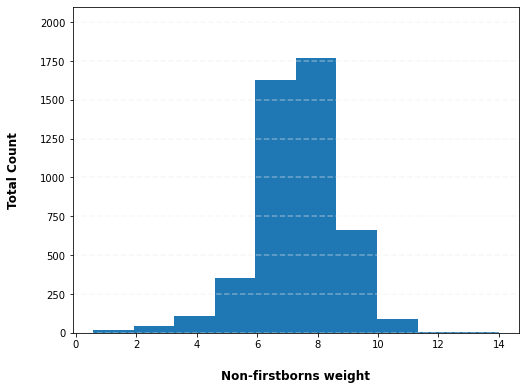

In [24]:
# create histogram of non-first born total weight
others_hist = weight_others.hist(column = 'totalwgt_lb', bins = 10, figsize = (8,6), grid = False)

others_hist = others_hist[0]
for x in others_hist:
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
        
    # Remove title
    x.set_title("")
    
    # Set X-axis label
    x.set_xlabel("Non-firstborns weight", labelpad=20, weight='bold', size=12)
    
    # Set Y-axis label
    x.set_ylabel("Total Count", labelpad=20, weight='bold', size=12)

plt.show()

In [25]:
# calculate mean of first born total weight
weight_firstborns_mean = weight_firstborns['totalwgt_lb'].mean()
weight_firstborns_mean

7.201094430437772

In [26]:
# calculate mean of non-first born total weight
weight_others_mean = weight_others['totalwgt_lb'].mean()
weight_others_mean

7.325855614973262

In [29]:
def CohensDEffectSize (group1, group2):
    '''
    Calculate Cohen's D effect size
    
    args
        group1 (df): first dataframe to compare
        group2 (df): second dataframe to compare
        
    returns:
        cohen_d (float): Cohen's D
    '''
    meanDiff = group1.mean() - group2.mean()
    
    var_1 = group1.var()
    var_2 = group2.var()
    len_1, len_2 = len(group1), len(group2)
                      
    pooled_var = (len_1 * var_1 + len_2 * var_2) / (len_1 + len_2)
    cohen_d = meanDiff / sqrt(pooled_var)
    
    return cohen_d         

In [30]:
CohensDEffectSize(weight_firstborns['totalwgt_lb'], weight_others['totalwgt_lb'])

-0.08893641177719079

Total weight for first borns is too small to say that there is a difference at all. With pregnancy length it was 0.078
which is small also.